# Physics 77 Capstone Project

## Overview
- Title of the Research: Simulation of a solar system with animation using pygame and analyse using matplotlib
- Group member: Yi-Jhan Huang, Ian Chang

## Abstract:
Our research project is based on the current physical detail of solar system.

## Technical Approach 
- Language of programming: mainly python
- Package requirements: matplotlib, numpy, scipy, pygame, math

## References
- https://towardsdatascience.com/simulate-a-tiny-solar-system-with-python-fbbb68d8207b 
- https://thepythoncodingbook.com/2021/12/11/simulating-3d-solar-system-python-matplotlib/ 

## Division of Responsibilities
- Ian Chang: Responsible for simulation part of the project
- Yi-Jhan Huang: Responsible for analysis part of the project
- Both: Topic Chose and Structure Design


# Project Proposal

We chose this project generally because recently, as you might’ve known, the James Webb Space telescope sent back marvelous high-resolution images of galaxies, nebulas, black holes, and more. These new images will allow us to have a greater understanding of the history of our universe, recording information about collisions of galaxies and births of stars. Being inspired by this phenomenal event, we’ve decided to use what we’ve learnt in the course and try to simulate a solar system, mainly using the libraries matplotlib and numpy.

# Attributes of Sun and Planets

|               | Sun       | Mercury   | Venus     | Earth     | Mars      | Jupiter   | Saturn    | Uranus    | Neptune   |
| -----------   | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- |
| Radius (km)   | 696342    | 2439.7    | 6051.8    | 6371.0    | 3389.5    |           |           |           |           |
| Mass (kg)     | 1.9885e30 | 3.3011e23 | 4.8675e24 | 1.08321e12| 6.4171e23 |           |           |           |           |
| Volumn (km^3) | 1.41e18   | 6.083e10  | 9.2843e11 | 5.97237e24| 1.63118e11|           |           |           |           |
	

### Importing Necessary Package for following codes

In [1]:
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pygame
import math

pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Class Planet

In [2]:
class Planet:
    AU = 149.6e6 * 1000             # distance from earth to sun
    G = 6.67428e-11                 # gravitational constant
    SCALE = 200 / AU                # small value to scale down the solar system to fit it on the screen
    TIMESTEP = 60 * 60 * 24         # 1 day


    # Constructor
    def __init__(self, name, dis_to_sun, radius, color, mass):
        self.name = name
        self.x = -dis_to_sun * self.AU           # x position
        self.y = 0                              # y position
        self.radius = radius                    # radius
        self.color = color                      # color
        self.mass = mass                        # mass
        self.sun = (dis_to_sun == 0)           # if it's the sun
        self.dis_to_sun = dis_to_sun * self.AU  # distance from planet to sun
        
        self.orbit = []
        self.x_speed = 0 # x speed
        self.y_speed = 0 if (self.sun) else math.sqrt((Planet.G * 1.98892 * 10 ** 30) / self.dis_to_sun)     # y speed


    # Draw line function for the updated_points
    def move(self):
        # divide by two because pygame (0, 0) is the top left corner
        x = self.x * self.SCALE + WIDTH / 2     # x position on screen
        y = self.y * self.SCALE + HEIGHT / 2    # y position on screen
        updated_points = []
        for point in self.orbit:
            x, y = point
            x = x * self.SCALE + WIDTH / 2
            y = y * self.SCALE + HEIGHT / 2
            updated_points.append((x, y))
        return updated_points, (x, y)


    def attraction(self, other):
        distance_x = other.x - self.x # distance between x positions
        distance_y = other.y - self.y # distance between y positions

        distance = math.hypot(distance_x, distance_y) # distance between planets

        force = self.G * self.mass * other.mass / distance ** 2 # force between the planets

        theta = math.atan2(distance_y, distance_x) # angle between the planets x and y positions

        force_x = math.cos(theta) * force # force in the x direction
        force_y = math.sin(theta) * force # force in the y direction
        
        return force_x, force_y


    def update_pos(self, planets):
        total_fx = total_fy = 0 # initialize x and y force to zero

        for planet in planets:
            if self == planet: # if the planet is itself
                continue
            fx, fy = self.attraction(planet)
            total_fx += fx
            total_fy += fy
        
        self.x_speed += total_fx / self.mass * self.TIMESTEP
        self.y_speed += total_fy / self.mass * self.TIMESTEP

        self.x += self.x_speed * self.TIMESTEP
        self.y += self.y_speed * self.TIMESTEP

        self.orbit.append((self.x, self.y))


    def __str__(self):
        return f"""Planet(name={self.name}, radius={self.radius}, color={self.color}, mass={self.mass}, dis_to_sun={self.dis_to_sun}, 
        x={self.x}, y={self.y}, sun={self.sun}, orbit_list={self.orbit[0:5]}, x_speed={self.x_speed}, y_speed={self.y_speed})
        """
        

### Set up constants (Color, window...etc)

In [3]:
WHITE = (255, 255, 255) # color white
YELLOW = (255, 255, 0) # color yellow
BLUE = (0, 0, 255) # color blue
RED = (255, 0, 0) # color red
GREY = (100, 100, 100) # color grey

WIDTH, HEIGHT = 800, 800

### Running pygame for visual simulation of solar system

In [4]:
def simulation(planets):
    pygame.init()

    # set pop up screen size
    SCREEN = pygame.display.set_mode((WIDTH, HEIGHT)) 

    FONT = pygame.font.SysFont("garamond", 16)

    # set title of window
    pygame.display.set_caption("Solar System")

    run = True
    clock = pygame.time.Clock()

    while run:
        SCREEN.fill((0, 0, 0)) # fill the screen black every frame, or else the old frames will still be on the screen

        # Quit loop when recieve quit signal
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False

        for planet in planets:
            planet.update_pos(planets) # update the position of the planets using the forces of attraction
            updated_points, (x, y) = planet.move() # draw the planets

            if len(updated_points) >= 2: pygame.draw.lines(SCREEN, planet.color, False, updated_points)

            if not planet.sun:
                distance_text = FONT.render(f"{planet.name}", True, WHITE)
                SCREEN.blit(distance_text, (x - distance_text.get_width() / 2, y - distance_text.get_height() / 2 - 20))

            pygame.draw.circle(SCREEN, planet.color, (x, y), planet.radius) # draw the planet

        pygame.display.update() # update the display
        clock.tick(60) # Set up update delay

    pygame.quit()

In [5]:
planets = [
        Planet('Sun', 0, 30, YELLOW, 1.98892 * 10 ** 30),
        Planet('Mercury', 0.387, 8, GREY, 0.330 * 10 ** 24),
        Planet('Venus', 0.723, 14, WHITE, 4.8685 * 10 ** 24),
        Planet('Earth', 1, 16, BLUE, 5.972 * 10 ** 24),
        Planet('Mars', 1.524, 12, RED, 6.39 * 10 ** 23)
]

simulation(planets)

In [6]:
planets = [
        Planet('Sun', 0, 30, YELLOW, 1.98892 * 10 ** 30),
        Planet('Mercury', 0.387, 8, GREY, 0.330 * 10 ** 24),
        Planet('Venus', 0.723, 14, WHITE, 4.8685 * 10 ** 24),
        Planet('Earth', 1, 16, BLUE, 5.972 * 10 ** 24),
        Planet('Mars', 1.524, 12, RED, 6.39 * 10 ** 23)
]

simulation(planets)

In [7]:
for planet in planets:
    print(planet)

Planet(name=Sun, radius=30, color=(255, 255, 0), mass=1.9889200000000002e+30, dis_to_sun=0.0, 
        x=-1040576.4643353407, y=998713.664751876, sun=True, orbit_list=[(-395.46942426354053, 4.843103645849915e-14), (-1186.6330239537288, 11.685654084580875), (-2373.254576824716, 46.78863795968859), (-3954.6290135274585, 117.0620652977588), (-5929.576161441081, 234.25461154743076)], x_speed=-0.13420339050513733, y_speed=0.2684287241455809)
        
Planet(name=Mercury, radius=8, color=(100, 100, 100), mass=3.3e+23, dis_to_sun=57895200000.0, 
        x=-45461895470.88043, y=33870189277.637135, sun=False, orbit_list=[(-57599560700.35345, 4137169666.4649696), (-57007536003.545845, 8253050912.057345), (-56119934364.51558, 12326140880.266018), (-54939161637.028015, 16334838612.165207), (-53469255026.00523, 20257568872.949585)], x_speed=28848.000610750652, y_speed=39488.80413720305)
        
Planet(name=Venus, radius=14, color=(255, 255, 255), mass=4.8685e+24, dis_to_sun=108160800000.0, 
      

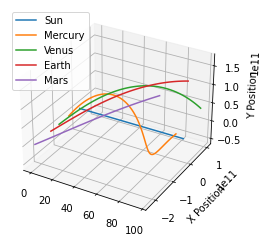

In [8]:
ax = plt.figure().add_subplot(projection='3d')
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax.set_ylabel("X Position")
ax.set_zlabel("Y Position")

for planet in planets:
    x, y = zip(*planet.orbit)
    ax.plot(np.arange(0, len(x), 1), x, y, label=planet.name)
leg = plt.legend(loc='upper left')
plt.show()

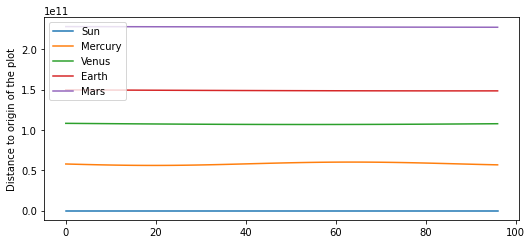

In [9]:
for planet in planets:
    x, y = zip(*planet.orbit)
    dis = []
    for i in range(len(x)):
        dis.append(math.hypot(x[i], y[i]))
    plt.plot(np.arange(0, len(x), 1), dis, label=planet.name)
plt.ylabel("Distance to origin of the plot")
leg = plt.legend(loc='upper left')
plt.show()

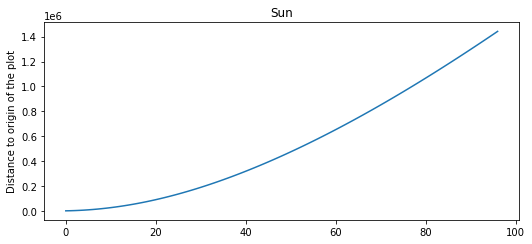

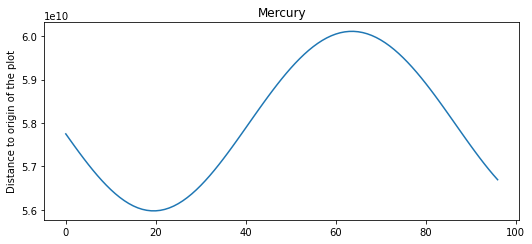

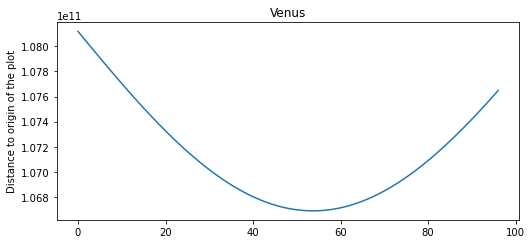

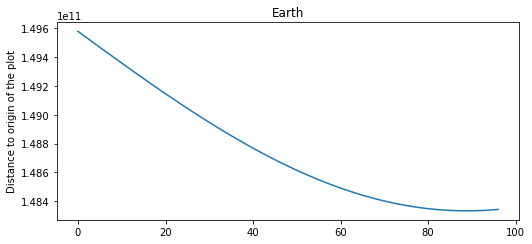

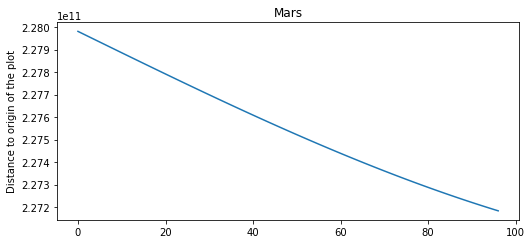

In [10]:
for planet in planets:
    x, y = zip(*planet.orbit)
    dis = []
    for i in range(len(x)):
        dis.append(math.hypot(x[i], y[i]))
    plt.title(planet.name)
    plt.ylabel("Distance to origin of the plot")
    plt.plot(np.arange(0, len(x), 1), dis)
    plt.show()